# Select Models and Train Them:

## Logistic Regression

In [18]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state = 42)

# Train the Logistic Regression model
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [19]:
# Get a list of predictions from Logistic Regression model
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# get more info about performance
report_lr = classification_report(y_test, y_pred_lr, target_names=['Neutral or Dissatisfied', 'Satisfaction'])

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Logistic Regression Classification Report:\n", report_lr)

Logistic Regression Accuracy: 0.8743840468124423
Logistic Regression Classification Report:
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.88      0.90      0.89     14723
           Satisfaction       0.87      0.84      0.85     11253

               accuracy                           0.87     25976
              macro avg       0.87      0.87      0.87     25976
           weighted avg       0.87      0.87      0.87     25976



## SVM

In [20]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [21]:
# Get a list of predictions from SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Get more performance metrics
report_svm = classification_report(y_test, y_pred_svm, target_names=['Neutral or Dissatisfied', 'Satisfaction'])

print(f"SVM Classifier Accuracy: {accuracy_svm}")
print("SVM Classifier Classification Report:\n", report_svm)

SVM Classifier Accuracy: 0.9555358792731753
SVM Classifier Classification Report:
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.95      0.97      0.96     14723
           Satisfaction       0.96      0.94      0.95     11253

               accuracy                           0.96     25976
              macro avg       0.96      0.95      0.95     25976
           weighted avg       0.96      0.96      0.96     25976



## Compare Models:

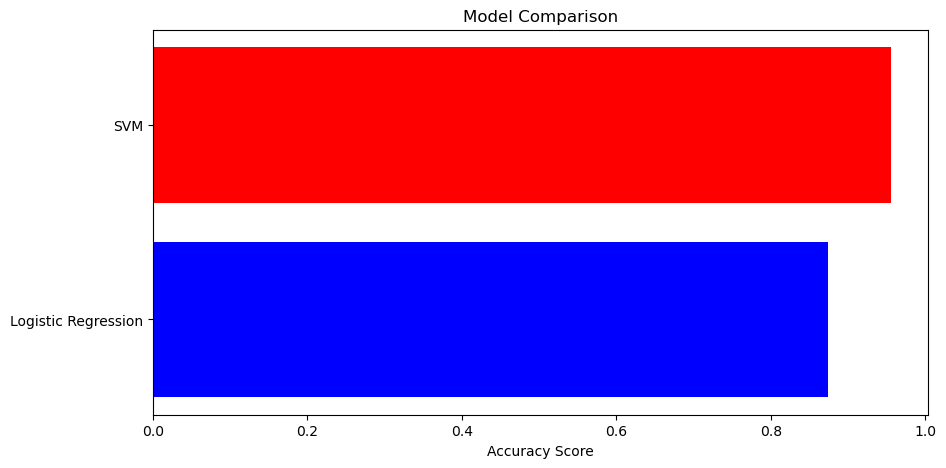

In [22]:
# Plot the accuracy scores of each model
models = ['Logistic Regression', 'SVM']
accuracy_scores = [accuracy_lr, accuracy_svm]

plt.figure(figsize=(10, 5))
plt.barh(models, accuracy_scores, color=['blue', 'red'])
plt.xlabel('Accuracy Score')
plt.title('Model Comparison')
plt.show()

# Fine Tune the Models:

## Logistic Regression

In [23]:
# Define the parameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear']  
}

# Initialize Logistic Regression model
lr = LogisticRegression()

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, 
                              cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search on the training data
grid_search_lr.fit(X_train_scaled, y_train)

# Retrieve the best parameters
best_params_lr = grid_search_lr.best_params_
print(f"Best parameters for Logistic Regression: {best_params_lr}")

Best parameters for Logistic Regression: {'penalty': 'l1', 'solver': 'liblinear'}


In [24]:
# Predict using the best estimator
y_pred_lr_best = grid_search_lr.best_estimator_.predict(X_test_scaled)

# Calculate performance metrics
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)
report_lr_best = classification_report(y_test, y_pred_lr_best, target_names=['Neutral or Dissatisfied', 'Satisfaction'])

print(f"Logistic Regression (Grid Search) Accuracy: {accuracy_lr_best}")
print("Logistic Regression (Grid Search) Classification Report:\n", report_lr_best)

Logistic Regression (Grid Search) Accuracy: 0.8742300585155528
Logistic Regression (Grid Search) Classification Report:
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.88      0.90      0.89     14723
           Satisfaction       0.87      0.84      0.85     11253

               accuracy                           0.87     25976
              macro avg       0.87      0.87      0.87     25976
           weighted avg       0.87      0.87      0.87     25976



## SVM

In [25]:
# Define the parameter grid that includes decision boundary distance, kernels, and gamma
param_grid_svm = {
    'SVM': {
        'model': SVC(),
        'params': {'C': [0.1, 10.0], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear'], 'probability': [True]}
    }
}

# Initialize SVM model
svm = SVC()

# Initialize GridSearchCV for searching for best SVM model:
grid_search_svm = GridSearchCV(param_grid_svm['SVM']['model'], param_grid_svm['SVM']['params'], cv=4, scoring='accuracy', n_jobs=4)

# Perform Grid Search on the training data
grid_search_svm.fit(X_train_scaled, y_train)

# Retrieve the best SVM's parameters
best_params_svm = grid_search_svm.best_params_
print(f"Best parameters for SVM: {best_params_svm}")

Best parameters for SVM: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}


In [26]:
# Predict using the best estimator
y_pred_svm_best = grid_search_svm.best_estimator_.predict(X_test_scaled)

# Calculate performance metrics
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
report_svm_best = classification_report(y_test, y_pred_svm_best, target_names=['Neutral or Dissatisfied', 'Satisfaction'])

print(f"SVM Classifier (Grid Search) Accuracy: {accuracy_svm_best}")
print("SVM Classifier (Grid Search) Classification Report:\n", report_svm_best)

SVM Classifier (Grid Search) Accuracy: 0.9599630428087466
SVM Classifier (Grid Search) Classification Report:
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.96      0.97      0.97     14723
           Satisfaction       0.97      0.94      0.95     11253

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976



# Present the Solution:

In [27]:
# Predict using the best estimator
y_pred_lr_best = grid_search_svm.best_estimator_.predict(X_test_scaled)

# Calculate performance metrics
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)
report_lr_best = classification_report(y_test, y_pred_lr_best, target_names=['Neutral or Dissatisfied', 'Satisfaction'])

print(f"SVM Classifier (Grid Search) Accuracy: {accuracy_lr_best}")
print("SVM Classifier (Grid Search) Classification Report:\n", report_lr_best)

SVM Classifier (Grid Search) Accuracy: 0.9599630428087466
SVM Classifier (Grid Search) Classification Report:
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.96      0.97      0.97     14723
           Satisfaction       0.97      0.94      0.95     11253

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976



In [28]:
# Predict using the best estimator
y_pred_svm_best = grid_search_svm.best_estimator_.predict(X_test_scaled)

# Calculate performance metrics
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
report_svm_best = classification_report(y_test, y_pred_svm_best, target_names=['Neutral or Dissatisfied', 'Satisfaction'])

print(f"SVM Classifier (Grid Search) Accuracy: {accuracy_svm_best}")
print("SVM Classifier (Grid Search) Classification Report:\n", report_svm_best)

SVM Classifier (Grid Search) Accuracy: 0.9599630428087466
SVM Classifier (Grid Search) Classification Report:
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.96      0.97      0.97     14723
           Satisfaction       0.97      0.94      0.95     11253

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976



In [33]:
# Predict using the best estimators from Grid Search
y_pred_lr_best = grid_search_lr.best_estimator_.predict(X_test_scaled)
y_pred_svm_best = grid_search_svm.best_estimator_.predict(X_test_scaled)

# Accuracy Scores
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)

# Confusion Matrices
cm_lr = confusion_matrix(y_test, y_pred_lr_best)
cm_svm = confusion_matrix(y_test, y_pred_svm_best)

Text(0, 0.5, 'Accuracy')

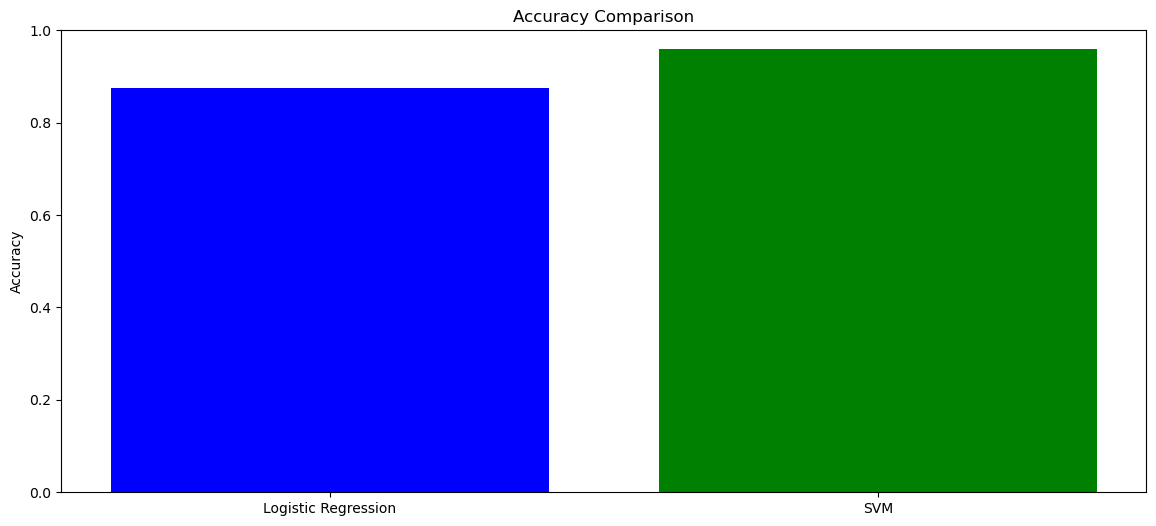

In [30]:
# Plotting
plt.figure(figsize=(14, 6))

# Accuracy Comparison
models = ['Logistic Regression', 'SVM']
accuracies = [accuracy_lr_best, accuracy_svm_best]
colors = ['blue', 'green']

plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

Text(145.72222222222223, 0.5, 'Actual')

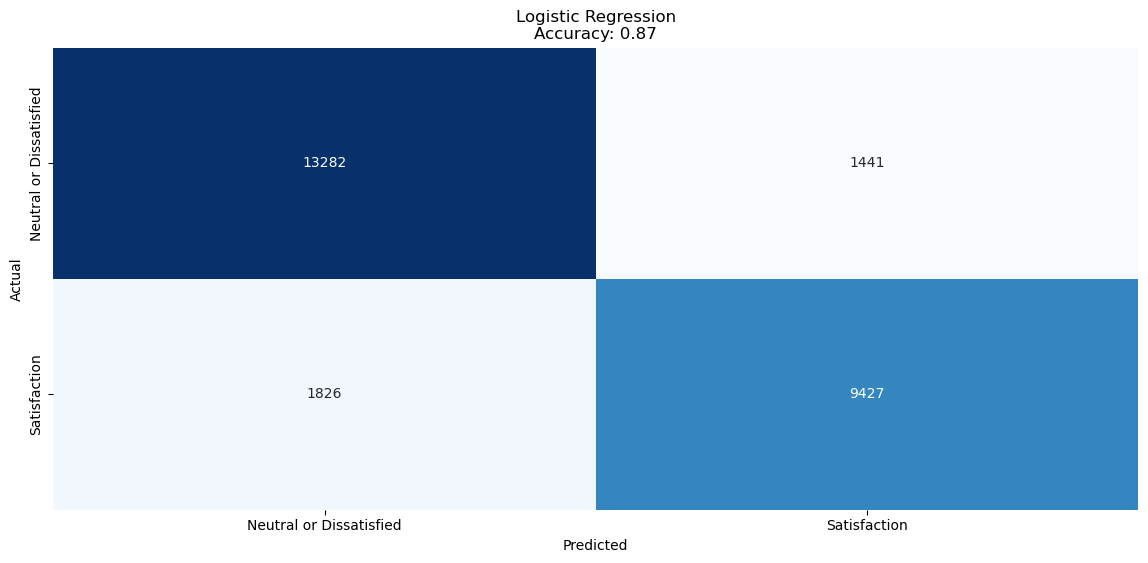

In [34]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(14, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Neutral or Dissatisfied', 'Satisfaction'],
            yticklabels=['Neutral or Dissatisfied', 'Satisfaction'])
plt.title(f'Logistic Regression\nAccuracy: {accuracy_lr_best:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

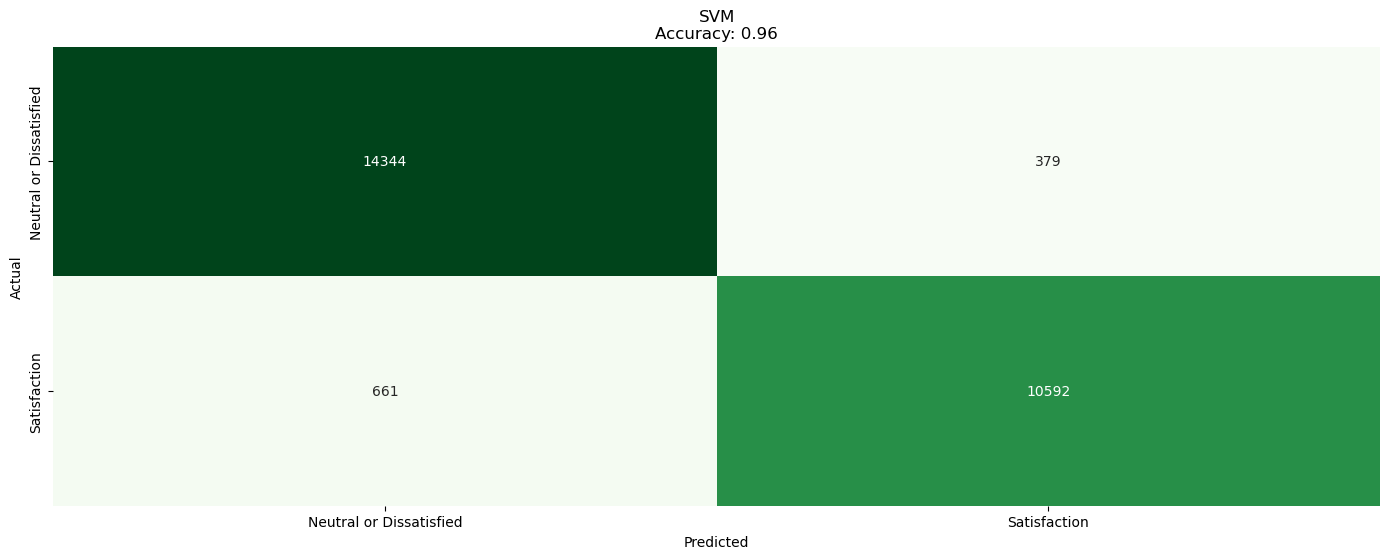

In [35]:
# Confusion Matrix for SVM
plt.figure(figsize=(14, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Neutral or Dissatisfied', 'Satisfaction'],
            yticklabels=['Neutral or Dissatisfied', 'Satisfaction'])
plt.title(f'SVM\nAccuracy: {accuracy_svm_best:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()